In [341]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import dowhy
from dowhy import CausalModel
import re
from collections import Counter



def load_data(filepath):
    df = pd.read_csv(filepath, header=None, skiprows=0)
    df.columns = df.iloc[0]
    df = df[1:]
    return df



# Load and preprocess data
file_path = r"C:\Users\nstep\TSU\SeniorProject\DataSet\listings.csv"
nashvilleDF = load_data(file_path)

#nashvilleDf to lower case

nashvilleDF.head()





C:\Users\nstep\AppData\Local\Temp\ipykernel_28952\459808379.py:21: DtypeWarning: Columns (0,2,9,22,23,29,30,31,34,35,37,38,41,42,43,44,45,46,47,48,49,51,52,53,54,56,57,58,61,62,63,64,65,66,67,68,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, header=None, skiprows=0)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,6422,https://www.airbnb.com/rooms/6422,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, TN",My husband and I are parents of 5 grown childr...,NaN,NaN,0%,NaN,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,1,1,['phone'],t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17143,-86.7357,Private room in home,Private room,1,NaN,1 private bath,NaN,1,"[""Essentials"", ""Bathtub"", ""Luggage dropoff all...",$43.00,30,365,30,30,365,365,30.0,365.0,NaN,t,0,0,0,141,2023-06-22,674,0,0,2009-04-30,2020-03-03,4.95,4.94,4.96,4.97,4.96,4.92,4.98,NaN,f,1,0,1,0,3.91
2,39870,https://www.airbnb.com/rooms/39870,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,"Nashville, TN",I am a newly retired elementary school teacher...,within a few hours,100%,93%,NaN,https://a0.muscache.com/im/users/171184/profil...,https://a0.muscache.com/im/users/171184/profil...,NaN,1,3,"['email', 'phone']",t,t,"Nashville, Tennessee, United States",District 25,NaN,36.12466,-86.81269,Private room in home,Private room,2,NaN,1 private bath,NaN,1,"[""Essentials"", ""Luggage dropoff allowed"", ""Sha...",$70.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,19,33,42,205,2023-06-22,372,64,6,2016-09-16,2023-06-19,4.94,4.96,4.94,4.99,4.98,4.94,4.94,NaN,f,1,0,1,0,4.52
3,72906,https://www.airbnb.com/rooms/72906,20230622195211,2023-06-23,city scrape,Rental unit in Nashville · ★4.91 · 2 bedrooms ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,https://www.airbnb.com/users/show/176117,Richard,2010-07-21,"Nashville, TN",I was born in England and came to the US as a ...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/176117/profil...,https://a0.muscache.com/im/users/176117/profil...,NaN,1,1,"['email', 'phone']",t,t,"Nashville, Tennessee, United States",District 18,NaN,36.13122,-86.80066,Entire rental unit,Entire home/apt,2,NaN,1 bath,2,2,"[""Essentials"", ""Luggage dropoff allowed"", ""Sha...",$109.00,2,7,2,2,1125,1125,2.0,1125.0,NaN,t,1,14,28,28,2023-06-23,691,49,2,2011-06-09,2023-06-18,4.91,4.9,

In [342]:
pd.options.display.max_columns = 200
# Colors sourced from here: https://usbrandcolors.com/airbnb-colors/
bnb_red = '#FF5A5F'
bnb_blue = '#00A699'
bnb_orange = '#FC642D'
bnb_lgrey = '#767676'
bnb_dgrey = '#484848'
bnb_maroon = '#92174D'

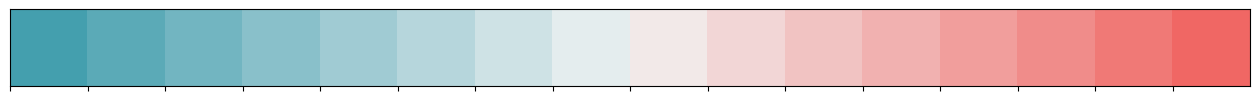

In [343]:
# Create diverging colormap for heatmaps
bnb_cmap = sns.diverging_palette(210,
                                 13,
                                 s=81,
                                 l=61,
                                 sep=3,
                                 n=16,
                                 as_cmap=True)

# Test colors
sns.palplot(sns.diverging_palette(210, 13, s=81, l=61, sep=3, n=16))

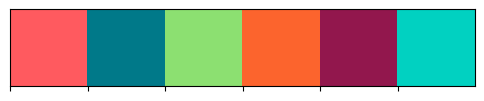

In [344]:
# Create color palette
bnb_palette = sns.color_palette(
    ["#FF5A5F", "#007989", "#8CE071", "#FC642D", "#92174D", "#01D1C1"])

# Test colors
sns.palplot(bnb_palette)

In [345]:
nashvilleDF.shape
#nashvilleDF.info()

#write nashvilleDF.info to csv 
info = nashvilleDF.info()
#write info to csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 1 to 8993
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            8993 non-null   object
 1   listing_url                                   8993 non-null   object
 2   scrape_id                                     8993 non-null   object
 3   last_scraped                                  8993 non-null   object
 4   source                                        8993 non-null   object
 5   name                                          8993 non-null   object
 6   description                                   8960 non-null   object
 7   neighborhood_overview                         6375 non-null   object
 8   picture_url                                   8993 non-null   object
 9   host_id                                       8993 non-null   object
 10  

In [346]:
# Visualize price table, changing them to floats and replacing the commas with a blank
prices = nashvilleDF['price'].apply(lambda s: float(s[1:].replace(',','')))

# Drop listings with a price of zero
prices = prices[prices!=0]

# Log prices
log_prices = np.log(prices)

print(log_prices.describe())

count    8993.000000
mean        5.330119
std         0.716709
min         2.302585
25%         4.859812
50%         5.308268
75%         5.749393
max        11.267383
Name: price, dtype: float64


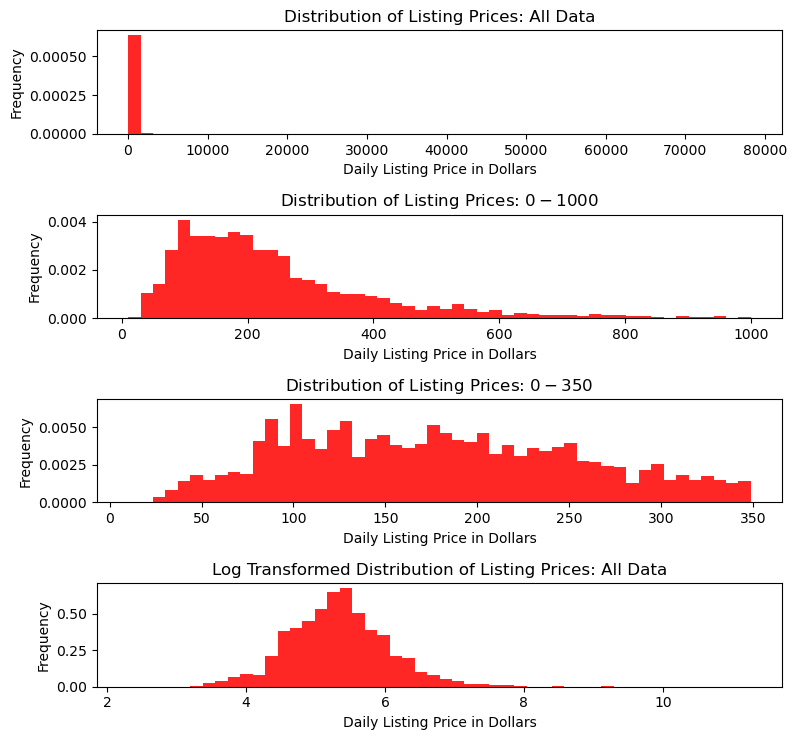

In [347]:
def plot_hist(n, titles, ranges):
    """
    Quick helper function to plot histograms
    """
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, density = 1, color='red', alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot histograms of price distribution
plot_hist(4, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: $0 - $1000', 
               'Distribution of Listing Prices: $0 - $350','Log Transformed Distribution of Listing Prices: All Data'], 
          [prices, prices[prices <= 1000], prices[prices < 350],log_prices])

In [348]:
# Convert relevant columns to datetime format
nashvilleDF.last_scraped = pd.to_datetime(
    nashvilleDF.last_scraped)

nashvilleDF.host_since = pd.to_datetime(
    nashvilleDF.host_since)

nashvilleDF.calendar_last_scraped = pd.to_datetime(
    nashvilleDF.calendar_last_scraped)

nashvilleDF.first_review = pd.to_datetime(
    nashvilleDF.first_review)

nashvilleDF.last_review = pd.to_datetime(
    nashvilleDF.last_review)



nashvilleDF.host_response_rate = nashvilleDF[
    'host_response_rate'].apply(lambda s: float(str(s).replace('%', '')))


Text(0.5, 1.0, 'Number of Listings by Propery Type')

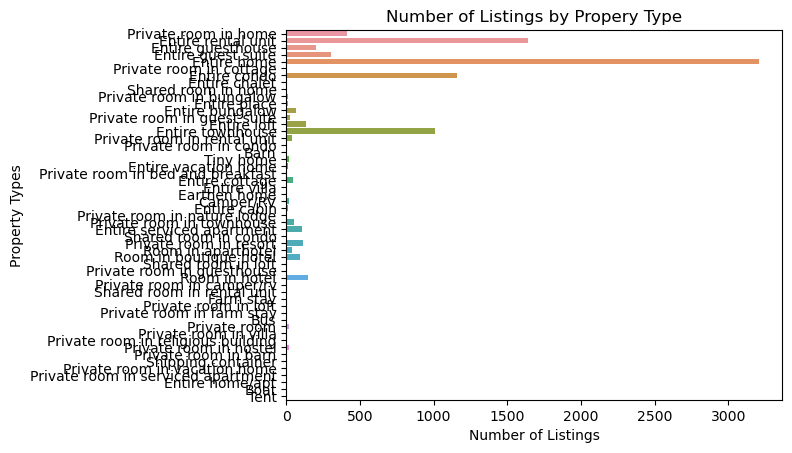

In [349]:
nashvilleDF.property_type.value_counts()

sns.countplot(y=nashvilleDF['property_type'])
plt.ylabel('Property Types')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Propery Type')

Bringing all private homes into one category

In [350]:


# Step 1: Create a mask to identify rows with 'Private' in the 'property_type' column
private_mask = nashvilleDF['property_type'].str.contains('Private')

# Step 2: Update the values in the 'property_type' column based on the mask
nashvilleDF.loc[private_mask, 'property_type'] = 'Private room'

nashvilleDF.replace('Aparthotel','Hotel',inplace=True)
nashvilleDF.replace('Room in aparthotel','Hotel',inplace=True)
nashvilleDF.replace('Room in hotel','Hotel',inplace=True)
nashvilleDF.replace('Room in boutique hotel','Hotel',inplace=True)
nashvilleDF.replace('Entire serviced apartment','Entire condo',inplace=True)
nashvilleDF.replace('Entire loft','Entire condo',inplace=True)

private_mask = nashvilleDF['property_type'].str.contains('Shared')

nashvilleDF.loc[private_mask, 'property_type'] = 'Shared room'

# Display the updated value counts
updated_value_counts = nashvilleDF['property_type'].value_counts()
updated_value_counts

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['property_type'].value_counts()
print(updated_value_counts_after_drop)


# List of property types to drop
drop_list = [
    "Entire bungalow", "Entire cottage", "Tiny home", "Camper/RV", "Entire cabin",
    "Entire vacation home", "Entire place", "Shared room", "Entire villa",
    "Farm stay", "Entire home/apt", "Earthen home", "Barn", "Entire chalet",
    "Bus", "Shipping container", "Boat", "Tent"
]

# Drop rows based on the property_type values in drop_list
nashvilleDF = nashvilleDF[~nashvilleDF['property_type'].isin(drop_list)]

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['property_type'].value_counts()
print(updated_value_counts_after_drop)


Entire home             3206
Entire rental unit      1642
Entire condo            1404
Entire townhouse        1010
Private room             723
Entire guest suite       304
Hotel                    278
Entire guesthouse        205
Entire bungalow           67
Entire cottage            47
Tiny home                 20
Camper/RV                 16
Entire cabin              15
Entire vacation home      15
Entire place              10
Shared room                9
Entire villa               7
Farm stay                  6
Entire home/apt            2
Barn                       1
Earthen home               1
Entire chalet              1
Bus                        1
Shipping container         1
Boat                       1
Tent                       1
Name: property_type, dtype: int64
Entire home           3206
Entire rental unit    1642
Entire condo          1404
Entire townhouse      1010
Private room           723
Entire guest suite     304
Hotel                  278
Entire guesthouse      

In [351]:
updated_value_counts_after_drop = nashvilleDF['host_response_time'].value_counts()
print(updated_value_counts_after_drop)

# Host Response Time
# We will treat nan values as 

nashvilleDF[
    'host_response_time'] = nashvilleDF.host_response_time.map({
        'within an hour':
        1,
        'within a few hours':
        2,
        'within a day':
        3,
        'a few days or more':
        4,
        np.nan:
        5
    })




updated_value_counts_after_drop = nashvilleDF['host_response_time'].value_counts()
print(updated_value_counts_after_drop)

within an hour        7089
within a few hours     510
within a day           191
a few days or more      39
Name: host_response_time, dtype: int64
1    7089
5     943
2     510
3     191
4      39
Name: host_response_time, dtype: int64


In [352]:


# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_is_superhost'].value_counts()
print(updated_value_counts_after_drop)


nashvilleDF['host_is_superhost'] = [
    1 if x == 't' else 0 for x in nashvilleDF.host_is_superhost
]
# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_is_superhost'].value_counts()
print(updated_value_counts_after_drop)




t    4158
f    4134
Name: host_is_superhost, dtype: int64
0    4614
1    4158
Name: host_is_superhost, dtype: int64


In [353]:

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['instant_bookable'].value_counts()
print(updated_value_counts_after_drop)

nashvilleDF['instant_bookable'] = [
    1 if x == 't' else 0 for x in nashvilleDF.instant_bookable
]

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['instant_bookable'].value_counts()
print(updated_value_counts_after_drop)

f    5182
t    3590
Name: instant_bookable, dtype: int64
0    5182
1    3590
Name: instant_bookable, dtype: int64


In [354]:


# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['has_availability'].value_counts()
print(updated_value_counts_after_drop)

nashvilleDF['has_availability'] = [
    1 if x == 't' else 0 for x in nashvilleDF.has_availability
]

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['has_availability'].value_counts()
print(updated_value_counts_after_drop)

t    8596
f     176
Name: has_availability, dtype: int64
1    8596
0     176
Name: has_availability, dtype: int64


In [355]:

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_has_profile_pic'].value_counts()
print(updated_value_counts_after_drop)

nashvilleDF['host_has_profile_pic'] = [
    1 if x == 't' else 0 for x in nashvilleDF.host_has_profile_pic
]

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_has_profile_pic'].value_counts()
print(updated_value_counts_after_drop)

t    8714
f      58
Name: host_has_profile_pic, dtype: int64
1    8714
0      58
Name: host_has_profile_pic, dtype: int64


In [356]:
# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_identity_verified'].value_counts()
print(updated_value_counts_after_drop)


nashvilleDF['host_identity_verified'] = [
    1 if x == 't' else 0 for x in nashvilleDF.host_identity_verified
]

# Display the updated value counts
updated_value_counts_after_drop = nashvilleDF['host_identity_verified'].value_counts()
print(updated_value_counts_after_drop)

t    7736
f    1036
Name: host_identity_verified, dtype: int64
1    7736
0    1036
Name: host_identity_verified, dtype: int64


In [357]:
# Property Type
# One hot encode
prop_type_dummies = pd.get_dummies(nashvilleDF.property_type,
                                   prefix='prop')

# Merge with df
nashvilleDF = nashvilleDF.merge(prop_type_dummies,
                                left_index=True,
                                right_index=True)


nashvilleDF.property_type.value_counts()

Entire home           3206
Entire rental unit    1642
Entire condo          1404
Entire townhouse      1010
Private room           723
Entire guest suite     304
Hotel                  278
Entire guesthouse      205
Name: property_type, dtype: int64

In [358]:
nashvilleDF.room_type.value_counts()

Entire home/apt    7806
Private room        942
Hotel room           24
Name: room_type, dtype: int64

In [359]:
# Room Type
# Create numerical column for room type
nashvilleDF['room_type_num'] = nashvilleDF.room_type.map({
    'Entire home/apt':
    3,
    'Private room':
    2,
    'Hotel room':
    1,
})

# One hot encode
room_type_dummies = pd.get_dummies(nashvilleDF.room_type,
                                   prefix='room')

# Drop "hotel room" column as base case
del room_type_dummies['room_Hotel room']

# Merge with df
nashvilleDF = nashvilleDF.merge(room_type_dummies,
                                                    left_index=True,
                                                    right_index=True)


nashvilleDF.room_type_num.value_counts()

3    7806
2     942
1      24
Name: room_type_num, dtype: int64

In [360]:
# Combine 'Private room' and 'Hotel room' into 'Private/Hotel room'
nashvilleDF['room_type'] = nashvilleDF['room_type'].replace(['Private room', 'Hotel room'], 'Private/Hotel room')

# Display the updated value counts for room_type column
updated_value_counts_room_type = nashvilleDF['room_type'].value_counts()
print(updated_value_counts_room_type)

# Map the updated room types to numeric values
nashvilleDF['room_type_num'] = nashvilleDF.room_type.map({
    'Entire home/apt': 2,
    'Private/Hotel room': 1
})

# Display the updated value counts for room_type_num column
updated_value_counts_room_type_num = nashvilleDF['room_type_num'].value_counts()
updated_value_counts_room_type_num


nashvilleDF.head()

Entire home/apt       7806
Private/Hotel room     966
Name: room_type, dtype: int64


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,prop_Entire condo,prop_Entire guest suite,prop_Entire guesthouse,prop_Entire home,prop_Entire rental unit,prop_Entire townhouse,prop_Hotel,prop_Private room,room_type_num,room_Entire home/apt,room_Private room
1,6422,https://www.airbnb.com/rooms/6422,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, TN",My husband and I are parents of 5 grown childr...,5,NaN,0%,0,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,1,1,['phone'],1,1,"Nashville, Tennessee, United States",District 6,NaN,36.17143,-86.7357,Private room,Private/Hotel room,1,NaN,1 private bath,NaN,1,"[""Essentials"", ""Bathtub"", ""Luggage dropoff all...",$43.00,30,365,30,30,365,365,30.0,365.0,NaN,1,0,0,0,141,2023-06-22,674,0,0,2009-04-30,2020-03-03,4.95,4.94,4.96,4.97,4.96,4.92,4.98,NaN,0,1,0,1,0,3.91,0,0,0,0,0,0,0,1,1,0,1
2,39870,https://www.airbnb.com/rooms/39870,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,"Nashville, TN",I am a newly retired elementary school teacher...,2,100.0,93%,0,https://a0.muscache.com/im/users/171184/profil...,https://a0.muscache.com/im/users/171184/profil...,NaN,1,3,"['email', 'phone']",1,1,"Nashville, Tennessee, United States",District 25,NaN,36.12466,-86.81269,Private room,Private/Hotel room,2,NaN,1 private bath,NaN,1,"[""Essentials"", ""Luggage dropoff allowed"", ""Sha...",$70.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,1,19,33,42,205,2023-06-22,372,64,6,2016-09-16,2023-06-19,4.94,4.96,4.94,4.99,4.98,4.94,4.94,NaN,0,1,0,1,0,4.52,0,0,0,0,0,0,0,1,1,0,1
3,72906,https://www.airbnb.com/rooms/72906,20230622195211,2023-06-23,city scrape,Rental unit in Nashville · ★4.91 · 2 bedrooms ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,https://www.airbnb.com/users/show/176117,Richard,2010-07-21,"Nashville, TN",I was born in England and came to the US as a ...,1,100.0,100%,1,https://a0.muscache.com/im/users/176117/profil...,https://a0.muscache.com/im/users/176117/profil...,NaN,1,1,"['email', 'phone']",1,1,"Nashville, Tennessee, United States",District 18,NaN,36.13122,-86.8006

In [361]:
nashvilleDF[nashvilleDF['bedrooms'].isnull()]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,prop_Entire condo,prop_Entire guest suite,prop_Entire guesthouse,prop_Entire home,prop_Entire rental unit,prop_Entire townhouse,prop_Hotel,prop_Private room,room_type_num,room_Entire home/apt,room_Private room
1,6422,https://www.airbnb.com/rooms/6422,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, TN",My husband and I are parents of 5 grown childr...,5,NaN,0%,0,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,1,1,['phone'],1,1,"Nashville, Tennessee, United States",District 6,NaN,36.17143,-86.7357,Private room,Private/Hotel room,1,NaN,1 private bath,NaN,1,"[""Essentials"", ""Bathtub"", ""Luggage dropoff all...",$43.00,30,365,30,30,365,365,30.0,365.0,NaN,1,0,0,0,141,2023-06-22,674,0,0,2009-04-30,2020-03-03,4.95,4.94,4.96,4.97,4.96,4.92,4.98,NaN,0,1,0,1,0,3.91,0,0,0,0,0,0,0,1,1,0,1
2,39870,https://www.airbnb.com/rooms/39870,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,"Nashville, TN",I am a newly retired elementary school teacher...,2,100.0,93%,0,https://a0.muscache.com/im/users/171184/profil...,https://a0.muscache.com/im/users/171184/profil...,NaN,1,3,"['email', 'phone']",1,1,"Nashville, Tennessee, United States",District 25,NaN,36.12466,-86.81269,Private room,Private/Hotel room,2,NaN,1 private bath,NaN,1,"[""Essentials"", ""Luggage dropoff allowed"", ""Sha...",$70.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,1,19,33,42,205,2023-06-22,372,64,6,2016-09-16,2023-06-19,4.94,4.96,4.94,4.99,4.98,4.94,4.94,NaN,0,1,0,1,0,4.52,0,0,0,0,0,0,0,1,1,0,1
4,258817,https://www.airbnb.com/rooms/258817,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.77 · 1 bedroom · 2 beds...,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,"Nashville, TN",For 35 years I was serving the world as a comm...,1,100.0,91%,0,https://a0.muscache.com/im/pictures/user/272f5...,https://a0.muscache.com/im/pictures/user/272f5...,NaN,19,24,"['email', 'phone']",1,1,"Nashville, Tennessee, United States",District 12,NaN,36.16076,-86.5915

All rooms have at least 1 room.

WILL PROBABLY WANT TO GET RID OF OUTLIERS!

In [362]:
# Extract numeric portion from the 'bathrooms_text' column and assign to 'bathrooms' column
nashvilleDF['bathrooms'] = nashvilleDF['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Drop the 'bathrooms_text' column
nashvilleDF = nashvilleDF.drop(columns=['bathrooms_text'])


#show nashvilleDF['bedrooms'] that are empty
nashvilleDF.bathrooms.value_counts()

1.0     3935
2.0     1503
2.5      761
3.5      672
3.0      603
4.0      527
1.5      320
4.5      141
8.0       61
6.0       56
5.0       42
7.0       37
5.5       22
6.5       20
9.0       20
12.0       8
7.5        7
16.0       6
8.5        6
12.5       4
13.5       4
9.5        3
0.0        2
10.5       2
17.5       2
14.0       1
17.0       1
18.0       1
11.0       1
13.0       1
Name: bathrooms, dtype: int64

MORE OUTLIERS!

In [363]:
nashvilleDF.neighbourhood.value_counts()

Nashville, Tennessee, United States               6163
Goodlettsville, Tennessee, United States            17
Brentwood, Tennessee, United States                 11
Berry Hill, Tennessee, United States                 6
Nashville, United States                             3
Antioch, Tennessee, United States                    2
Hermitage, Tennessee, United States                  1
Nashville , Tennessee, United States                 1
Nashville\nHermitage, Tennessee, United States       1
Nashville Hermitage, Tennessee, United States        1
Nashville , Tn, United States                        1
Greenbrier, Tennessee, United States                 1
NASHVILLE, Tennessee, United States                  1
Madison, Tennessee, United States                    1
Smyrna, Tennessee, United States                     1
Pegram, Tennessee, United States                     1
Name: neighbourhood, dtype: int64

In [364]:
nashvilleDF.neighbourhood.fillna('Empty',inplace=True)

nashvilleDF.neighbourhood.value_counts()

Nashville, Tennessee, United States               6163
Empty                                             2560
Goodlettsville, Tennessee, United States            17
Brentwood, Tennessee, United States                 11
Berry Hill, Tennessee, United States                 6
Nashville, United States                             3
Antioch, Tennessee, United States                    2
Nashville Hermitage, Tennessee, United States        1
Nashville\nHermitage, Tennessee, United States       1
Nashville , Tn, United States                        1
Nashville , Tennessee, United States                 1
Greenbrier, Tennessee, United States                 1
NASHVILLE, Tennessee, United States                  1
Hermitage, Tennessee, United States                  1
Madison, Tennessee, United States                    1
Smyrna, Tennessee, United States                     1
Pegram, Tennessee, United States                     1
Name: neighbourhood, dtype: int64

Droping neighbourhood

In [365]:
#drop neighbourhood from nashvilleDF
nashvilleDF.drop('neighbourhood',axis=1,inplace=True)

In [366]:
nashvilleDF.neighbourhood_cleansed.value_counts()

District 19    2060
District 17     987
District 21     904
District 5      889
District 15     625
District 6      612
District 2      391
District 7      289
District 18     277
District 20     233
District 8      194
District 16     182
District 24     154
District 13     102
District 26      80
District 14      69
District 25      62
District 1       61
District 12      58
District 3       56
District 29      52
District 11      52
District 27      49
District 33      38
District 4       37
District 9       34
District 22      33
District 10      32
District 28      29
District 30      28
District 31      27
District 23      22
District 34      19
District 32      19
District 35      16
Name: neighbourhood_cleansed, dtype: int64

In [367]:


# Extract the district number from the 'neighbourhood_cleansed' column and assign to 'neighbourhood_cleansed_num'
nashvilleDF['neighbourhood_cleansed_num'] = nashvilleDF['neighbourhood_cleansed'].str.extract('(\d+)').astype(int)

# Display the updated value counts for the 'neighbourhood_cleansed_num' column
updated_neighbourhood_cleansed_num_value_counts = nashvilleDF['neighbourhood_cleansed_num'].value_counts()
updated_neighbourhood_cleansed_num_value_counts




19    2060
17     987
21     904
5      889
15     625
6      612
2      391
7      289
18     277
20     233
8      194
16     182
24     154
13     102
26      80
14      69
25      62
1       61
12      58
3       56
29      52
11      52
27      49
33      38
4       37
9       34
22      33
10      32
28      29
30      28
31      27
23      22
34      19
32      19
35      16
Name: neighbourhood_cleansed_num, dtype: int64

Amenities

In [368]:
import re
from collections import Counter

# Format amenities column for analysis
nashvilleDF.amenities = nashvilleDF.amenities.apply(
    lambda x: [i.strip() for i in re.sub('[^a-zA-Z,\/\s\d-]*', '', x.lower()).split(sep=',')] if isinstance(x, str) else x)

# Create a flat list of all amenities entries
amenities_list = [item for sublist in nashvilleDF.amenities for item in sublist if isinstance(sublist, list)]

# Count amenities occurrences
amenity_counts = Counter(amenities_list).most_common()

# Examine the top 20 amenities
top_amenity_counts = amenity_counts[0:20]

# Look at the 90 least common amenities
lowest_amenity_counts = amenity_counts[-90:]

# Total unique amenities
total_unique_amenities = len(set(amenities_list))

lowest_amenity_counts, total_unique_amenities



([('lu2019octaine body soap', 1),
  ('96 hdtv with apple tv', 1),
  ('miele  refrigerator', 1),
  ('miele gas stove', 1),
  ('all in one conditioner', 1),
  ('all in one shampoo', 1),
  ('50 tv with disney', 1),
  ('samsung - stainless steel refrigerator', 1),
  ('bar soap body soap', 1),
  ('fast wifi u2013 224 mbps', 1),
  ('plain product body soap', 1),
  ('terra pure travel set body soap', 1),
  ('stainless steel - fisher paykel refrigerator', 1),
  ('fisher paykel stainless steel single oven', 1),
  ('fisher paykel stainless steel gas stove', 1),
  ('paul mitchel conditioner', 1),
  ('dove and others body soap', 1),
  ('fast wifi u2013 257 mbps', 1),
  ('sonos sound bar sound system', 1),
  ('fast wifi u2013 227 mbps', 1),
  ('fridgedaire refrigerator', 1),
  ('fast wifi u2013 162 mbps', 1),
  ('58 tv', 1),
  ('la botega  conditioner', 1),
  ('la botega  shampoo', 1),
  ('la botega  body soap', 1),
  ('pool - saltwater', 1),
  ('whirlpool single oven', 1),
  ('klipsch bluetooth so

In [369]:
# Make a list of amenities of interest
amenities_of_interest = [x[0] for x in amenity_counts[0:70]]

#print amenity_counts 1 per row
for amenity in amenity_counts:
    print(amenity)
    
print(amenity_counts)



('smoke alarm', 8666)
('essentials', 8139)
('wifi', 8096)
('kitchen', 8064)
('hair dryer', 7808)
('iron', 7573)
('hangers', 7395)
('dishes and silverware', 7300)
('microwave', 7196)
('self check-in', 7145)
('hot water', 7105)
('bed linens', 7094)
('refrigerator', 6971)
('carbon monoxide alarm', 6837)
('fire extinguisher', 6807)
('cooking basics', 6717)
('shampoo', 6664)
('free parking on premises', 6575)
('dishwasher', 6108)
('heating', 5885)
('air conditioning', 5707)
('first aid kit', 5305)
('private entrance', 5264)
('extra pillows and blankets', 5241)
('dedicated workspace', 5135)
('coffee maker', 5109)
('oven', 5005)
('washer', 4666)
('bathtub', 4535)
('tv', 4423)
('stove', 4271)
('free street parking', 3873)
('long term stays allowed', 3782)
('dryer', 3765)
('security cameras on property', 3741)
('freezer', 3651)
('wine glasses', 3397)
('toaster', 3364)
('cleaning products', 3254)
('coffee', 3110)
('keypad', 3098)
('dining table', 3095)
('baking sheet', 3073)
('body soap', 3018)


In [370]:
combine_keywords = {
    "coffee": "coffee",
    "shampoo": "shampoo",
    "toaster": "toaster",
    "crib": "crib",
    "hot tub": "hot tub",
    "refrigerator": "refrigerator",
    "gym": "gym",
    "resort access": "resort access",
    "microwave": "microwave",
    "kitchen": "kitchen",
    "camera": "camera",
    "cable": "cable",
    "grill": "grill",
    "stove": "stove",
    "backyard": "backyard",
    "bluetooth": "bluetooth",
    "wifi": "wifi",
    "oven": "oven",
    "sono": "sono",
    "disney": "disney",
    "high chair": "high chair",
    "tv": "tv", 
    "hdtv": "tv", # Note: TV combines with HDTV
    "hbo": "hbo",
    "netflix": "netflix",
    "pool": "pool",
    "conditioner": "conditioner",
    "soap": "soap",
    "iron": "iron",
    "sony": "sony",
    "sound system": "sound system",
    "heating": " radiant heating",
    "stainless": "stainless",
    "washer": "washer",
    "dryer": "dryer",
    "free parking": "free parking",
    "baby monitor": "baby monitor",
    "baby bath": "baby bath",
    "body wash": "body wash",
    "changing table": "changing table",
    "books and toys": "books and toys",
    "clothing storage": "clothing storage",
    "exercise equipment": "exercise equipment",
    "carport": "carport",
    "free residential garage": "free residential garage",
    "game console": "game console",
    "fireplace": "fireplace",
    "paid parking garage": "paid parking garage",
    "paid parking lot off": "paid parking lot off",
    "paid parking lot on": "paid parking lot on",
    "paid parking on premises": "paid parking on premises",
    "paid valet parking": "paid valet parking",
    "hot water": "hot water",
    "free driveway": "free driveway",

}

# List to store new aggregated amenity counts
aggregated_amenity_counts = {}

# Loop through amenities and aggregate based on keywords
for amenity, count in amenity_counts:
    found = False
    for keyword, new_amenity in combine_keywords.items():
        if keyword in amenity.lower():
            # Special handling for "oven" to ensure it doesn't get overshadowed by "toaster"
            if keyword == "oven" and "toaster" in amenity.lower():
                continue
            # Special handling for "hot water" to ensure "hot water kettle" doesn't get combined
            if keyword == "hot water" and "kettle" in amenity.lower():
                continue
            if new_amenity not in aggregated_amenity_counts:
                aggregated_amenity_counts[new_amenity] = 0
            aggregated_amenity_counts[new_amenity] += count
            found = True
            break
    if not found:
        if amenity not in aggregated_amenity_counts:
            aggregated_amenity_counts[amenity] = 0
        aggregated_amenity_counts[amenity] += count

# Convert dictionary to list of tuples and sort
sorted_amenity_counts = sorted(aggregated_amenity_counts.items(), key=lambda x: x[1], reverse=True)

# Save sorted_amenity_counts to csv
df = pd.DataFrame(sorted_amenity_counts, columns=["Amenity", "Count"])
df.to_csv('new_amenity_counts.csv', index=False)

In [371]:
# Assuming nashvilleDF has a column 'amenities' that is either a string or list

# Ensure that the 'amenities' column is a list
nashvilleDF['amenities'] = nashvilleDF['amenities'].apply(lambda x: x if isinstance(x, list) else x.split(','))

# Define a function to aggregate amenities based on combine_keywords
def aggregate_amenities(amenities_list):
    aggregated_list = []
    for amenity in amenities_list:
        found = False
        for keyword, new_amenity in combine_keywords.items():
            if keyword in amenity.lower():
                aggregated_list.append(new_amenity)
                found = True
                break
        if not found:
            aggregated_list.append(amenity)
    return aggregated_list

# Apply the aggregate_amenities function to the amenities column
nashvilleDF['aggregated_amenities'] = nashvilleDF['amenities'].apply(aggregate_amenities)

# Create dummy variables
amenities_dummies = pd.get_dummies(nashvilleDF['aggregated_amenities'].apply(pd.Series).stack()).sum(level=0)

# Join the dummy variables to the original DataFrame and drop the amenities columns
nashvilleDF = nashvilleDF.join(amenities_dummies)
nashvilleDF = nashvilleDF.drop(["amenities", "aggregated_amenities"], axis=1)


C:\Users\nstep\AppData\Local\Temp\ipykernel_28952\649658566.py:24: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amenities_dummies = pd.get_dummies(nashvilleDF['aggregated_amenities'].apply(pd.Series).stack()).sum(level=0)


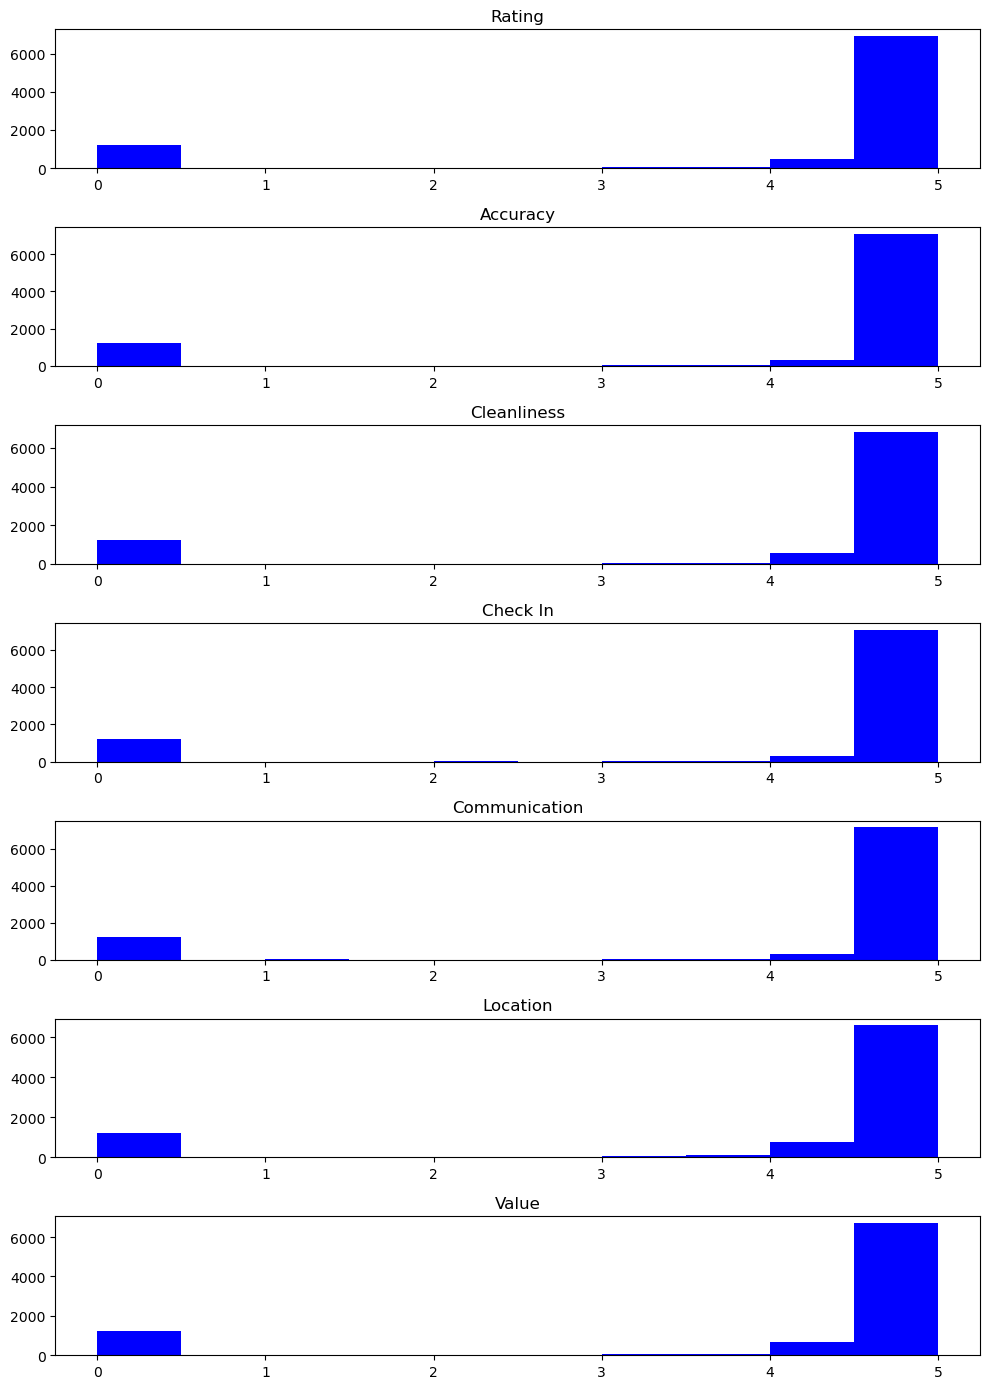

In [372]:
# Convert columns to numeric and handle NaN values
columns_to_convert = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for col in columns_to_convert:
    nashvilleDF[col] = pd.to_numeric(nashvilleDF[col], errors='coerce')
    nashvilleDF[col].fillna(0, inplace=True)


# Define the size of the entire figure. (width, height)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(10, 14))

ax1.hist(nashvilleDF.review_scores_rating, color='blue')
ax1.set_title('Rating')
ax2.hist(nashvilleDF.review_scores_accuracy, color='blue')
ax2.set_title('Accuracy')
ax3.hist(nashvilleDF.review_scores_cleanliness, color='blue')
ax3.set_title('Cleanliness')
ax4.hist(nashvilleDF.review_scores_checkin, color='blue')
ax4.set_title('Check In')
ax5.hist(nashvilleDF.review_scores_communication, color='blue')
ax5.set_title('Communication')
ax6.hist(nashvilleDF.review_scores_location, color='blue')
ax6.set_title('Location')
ax7.hist(nashvilleDF.review_scores_value, color='blue')
ax7.set_title('Value')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()  # This ensures that the titles and plots don't overlap
plt.show()


In [373]:
def findOutliers(df, column, lim_scalar=4):
    """
    Returns outliers above the max limit for a column in a dataframe
    Adjust outlier cutoff to q75 + 4*iqr to include more data
    ---
    input: DataFrame, column(series),lim_scalar(float)
    output: DataFrame
    """
    q25, q50, q75 = df[column].quantile(q=[0.25, 0.5, 0.75])
    iqr = q75 - q25
    # max limits to be considered an outlier
    max_ = q75 + lim_scalar * iqr
    # identify the points
    outlier_mask = [True if x > max_ else False for x in df[column]]
    print('{} outliers found out of {} data points, {}% of the data. {} is the max'.format(
        sum(outlier_mask), len(df[column]),
        100 * (sum(outlier_mask) / len(df[column])),max_))
    return outlier_mask

In [374]:
#average number of bathrooms in nashvilleDF
# Bathrooms
# Fill na with 1
nashvilleDF.bathrooms.fillna(1,inplace=True)
nashvilleDF.bathrooms.mean()

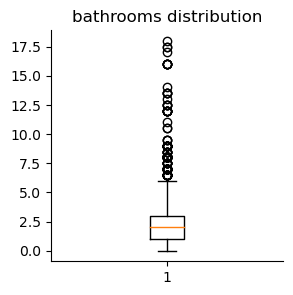

In [375]:
# Look at the distribution of the bathrooms column
plt.figure(figsize=(3,3))
plt.boxplot(nashvilleDF.bathrooms)
sns.despine()
plt.title('bathrooms distribution');

In [376]:
# Remove bathroom outliers
nashvilleDF = nashvilleDF[np.logical_not(
    findOutliers(nashvilleDF, 'bathrooms'))]

28 outliers found out of 8772 data points, 0.31919744642042863% of the data. 11.0 is the max


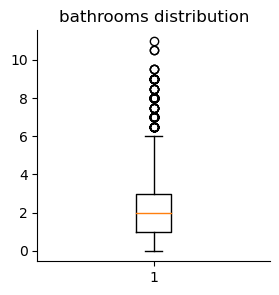

In [377]:
# Look at the distribution of the bathrooms column
plt.figure(figsize=(3,3))
plt.boxplot(nashvilleDF.bathrooms)
sns.despine()
plt.title('bathrooms distribution');

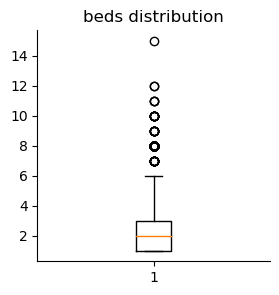

In [378]:

# Convert non-numeric values in the 'bedrooms' column to NaN
nashvilleDF['bedrooms'] = pd.to_numeric(nashvilleDF['bedrooms'], errors='coerce')

# Replace NaN values with 1
nashvilleDF['bedrooms'].fillna(1, inplace=True)

# Plot the boxplot for the cleaned 'bedrooms' column
plt.figure(figsize=(3,3))
plt.boxplot(nashvilleDF['bedrooms'])
sns.despine()
plt.title('beds distribution')
plt.show()

In [379]:
# Remove bedroom outliers
nashvilleDF = nashvilleDF[np.logical_not(
    findOutliers(nashvilleDF, 'bedrooms',lim_scalar=6))]

0 outliers found out of 8744 data points, 0.0% of the data. 15.0 is the max


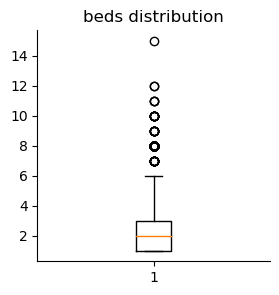

In [380]:
# Plot the boxplot for the cleaned 'bedrooms' column
plt.figure(figsize=(3,3))
plt.boxplot(nashvilleDF['bedrooms'])
sns.despine()
plt.title('beds distribution')
plt.show()

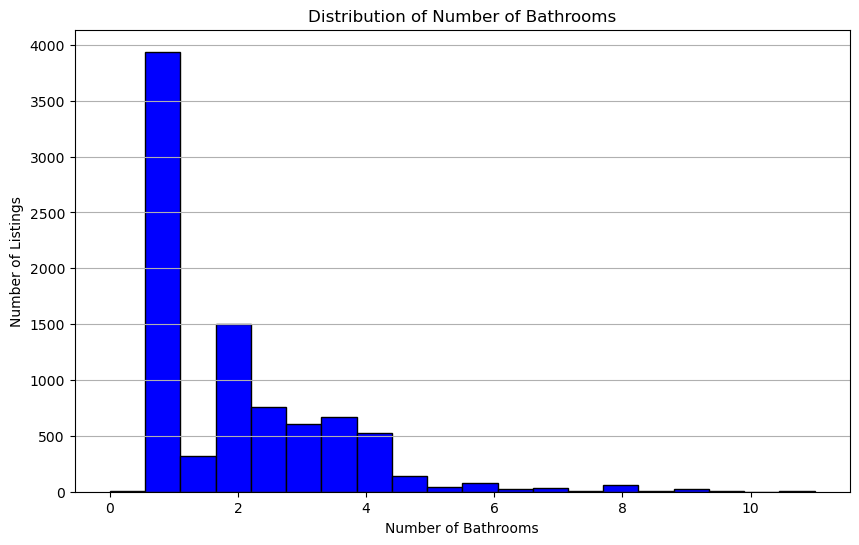

In [381]:
# Plot distribution of the number of bathrooms
plt.figure(figsize=(10, 6))
plt.hist(nashvilleDF['bathrooms'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.show()

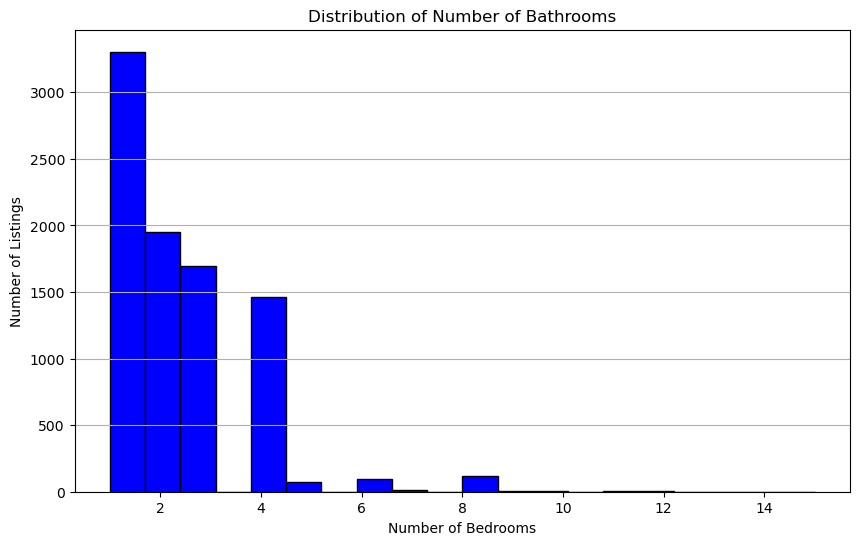

In [382]:
# Plot distribution of the number of bathrooms
plt.figure(figsize=(10, 6))
plt.hist(nashvilleDF['bedrooms'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.show()

In [383]:
# Calculate estimated number of bookings
nashvilleDF['est_bookings'] = nashvilleDF.number_of_reviews * 2

# Replace entries where unit is brand new with est_bookings = 1
nashvilleDF['est_bookings'] = [
    1 if nashvilleDF.first_review.iloc[idx] == nashvilleDF.last_review.iloc[idx] else x
    for idx, x in enumerate(nashvilleDF.est_bookings)
]

In [384]:
# Convert 'minimum_nights' to numeric and handle NaN values (assuming a default value of 1)
nashvilleDF['minimum_nights'] = pd.to_numeric(nashvilleDF['minimum_nights'], errors='coerce')
nashvilleDF['minimum_nights'].fillna(1, inplace=True)

# Calculate estimated number of nights booked per year
# Use 3 days as the average length of a stay
# Unless the minimum number of days is greater than 3, then use that number
nashvilleDF['est_booked_nights_per_year'] = [
    3 if x < 3 else x
    for x in nashvilleDF.minimum_nights  # avg stay length
] * nashvilleDF.reviews_per_month * 2 * 12



In [385]:
# Calculate estimated number of nights booked
# Use 3 days as the average length of a stay
# Unless the minimum number of days is greater than 3, then use that number

nashvilleDF['est_booked_nights'] = (
    [
        3 if x < 3 else x
        for x in nashvilleDF.minimum_nights
    ] *  # avg stay length
    nashvilleDF['est_bookings'])

In [386]:
# Convert 'est_booked_nights' to numeric and handle NaN values
nashvilleDF['est_booked_nights'] = pd.to_numeric(nashvilleDF['est_booked_nights'], errors='coerce')
nashvilleDF['est_booked_nights'].fillna(0, inplace=True)

# Occupancy Rate = total_booked_nights / total_available_nights
nashvilleDF['occupancy_rate'] = nashvilleDF['est_booked_nights'] / (
    (nashvilleDF.last_review - nashvilleDF.first_review).dt.days + 1)

# The next line seems redundant and is the same as the previous one. Consider removing it.
# Occupancy Rate = total_booked_nights / total_available_nights
nashvilleDF['occupancy_rate'] = nashvilleDF['est_booked_nights'] / (
    (nashvilleDF.last_review - nashvilleDF.first_review).dt.days + 1)


In [387]:
# Convert 'availability_365' to numeric and handle NaN values
nashvilleDF['availability_365'] = pd.to_numeric(nashvilleDF['availability_365'], errors='coerce')
nashvilleDF['availability_365'].fillna(0, inplace=True)


# Convert 'est_booked_nights_per_year' to numeric and handle NaN values
nashvilleDF['est_booked_nights_per_year'] = pd.to_numeric(nashvilleDF['est_booked_nights_per_year'], errors='coerce')
nashvilleDF['est_booked_nights_per_year'].fillna(0, inplace=True)

# Calculate occupancy rate
#nashvilleDF['occupancy_rate2'] = nashvilleDF['est_booked_nights_per_year'] / (nashvilleDF['availability_365'] + 1)



Getting rid of data that isnt numerical or helpful.

In [388]:
columns_to_drop = [
    "listing_url",
    "scrape_id",
    "source",
    "name",
    "description",
    "neighborhood_overview",
    "picture_url",
    "host_id",
    "host_url",
    "host_name",
    "host_location",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "host_verifications",
    "neighbourhood_cleansed",
    "neighbourhood_group_cleansed",
    "latitude",
    "longitude",
    'property_type',
    'room_type',
    'est_booked_nights_per_year',
    'est_booked_nights',
    'occupancy_rate',
    'host_listings_count',
    'est_bookings',
    'calculated_host_listings_count',
    'calculated_host_listings_count_private_rooms',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calculated_host_listings_count_entire_homes',
    'host_total_listings_count',
    'availability_90',
    'availability_60', 'minimum_nights',
    'maximum_minimum_nights', 'review_scores_communication',
    'smaller', 'ge', 'irish spring', 'lotion','suave', 'dove', 'dove anti-stress moisturizing cream bar','dr teals', 'smaller fridge',
    'organic', 'olympic-sized','number_of_reviews_l30d', 'number_of_reviews_ltm',
    '5-10 years old', '2-5 years old',


]
nashvilleDF['price'] = nashvilleDF['price'].str.replace('$', '').str.replace(',', '').astype(float)

nashvilleDF = nashvilleDF.drop(columns=columns_to_drop, errors='ignore')


C:\Users\nstep\AppData\Local\Temp\ipykernel_28952\323902535.py:44: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nashvilleDF['price'] = nashvilleDF['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [389]:
import pandas as pd

# Assuming 'nashvilleDF' is your DataFrame
# Convert the 'price' column to numeric (assuming it contains strings representing numbers)
nashvilleDF['price'] = pd.to_numeric(nashvilleDF['price'], errors='coerce')

try:
    # Calculate the required statistics
    total_entries = len(nashvilleDF['price'])
    entries_500_or_less = len(nashvilleDF[nashvilleDF['price'] <= 500])
    entries_over_500 = len(nashvilleDF[nashvilleDF['price'] > 1000])
    
    results = total_entries, entries_500_or_less, entries_over_500
except Exception as e:
    error_message = str(e)
    results = None

results, error_message if results is None else None


((8744, 7875, 164), None)

In [390]:
#drop first_review	last_review last_scraped	host_since
nashvilleDF.drop(['first_review','last_review','last_scraped','host_since',
                  'calendar_updated','calendar_last_scraped','license'],axis=1,inplace=True)

#host_acceptance_rate has % on it, drop the % from it
nashvilleDF['host_acceptance_rate'] = nashvilleDF['host_acceptance_rate'].str.replace('%', '').astype(float)


In [391]:
missing_data = nashvilleDF.isnull().sum()
print(missing_data[missing_data > 0])

host_response_rate       943
host_acceptance_rate     805
beds                      55
reviews_per_month       1213
dtype: int64


In [392]:
nashvilleDF = nashvilleDF.apply(pd.to_numeric, errors='coerce')

nashvilleDF["host_response_rate"] = nashvilleDF["host_response_rate"].fillna(nashvilleDF["host_response_rate"].median())
nashvilleDF["host_acceptance_rate"] = nashvilleDF["host_acceptance_rate"].fillna(nashvilleDF["host_acceptance_rate"].median())

# Impute missing values for beds with the median
nashvilleDF["beds"] = nashvilleDF["beds"].fillna(nashvilleDF["beds"].median())

# Convert reviews_per_month to an integer column
nashvilleDF["reviews_per_month"] = nashvilleDF["reviews_per_month"].astype("float64")

# Impute missing values for reviews_per_month and occupancy_rate with the mean
nashvilleDF["reviews_per_month"] = nashvilleDF["reviews_per_month"].fillna(nashvilleDF["reviews_per_month"].mean())

In [393]:
#limit price between 200-300
nashvilleDF = nashvilleDF[nashvilleDF['price'] >= 000]


nashvilleDF = nashvilleDF[nashvilleDF['price'] <= 1000]


In [394]:
missing_data = nashvilleDF.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [395]:
#write nashvilleDF to a csv file
nashvilleDF.to_csv('nashvilleDF.csv', index=False)

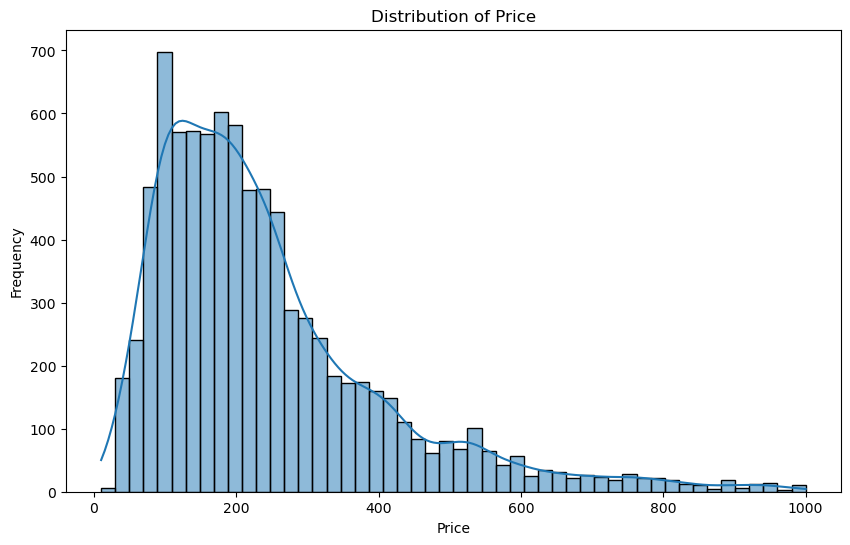

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(nashvilleDF['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [313]:

# Split data into features (X) and target (y)
X = nashvilleDF.drop('price', axis=1)
y = nashvilleDF['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
# Calculate and print R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.589547140404622


In [314]:
#top 5 prices
nashvilleDF.sort_values(by='price', ascending=False).head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,maximum_nights,minimum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_shared_rooms,reviews_per_month,prop_Entire condo,prop_Entire guest suite,prop_Entire guesthouse,prop_Entire home,prop_Entire rental unit,prop_Entire townhouse,prop_Hotel,prop_Private room,room_type_num,room_Entire home/apt,room_Private room,neighbourhood_cleansed_num,,radiant heating,2-5 years old,5-10 years old,ac - split type ductless system,air conditioning,all natural,amazon prime video,and 10 years old,and 5-10 years old,and dresser,and wardrobe,and xbox one,argan oil of morocco,baby bath,baby monitor,baby safety gates,babysitter recommendations,backyard,baking sheet,barbecue utensils,bathtub,bay view,beach access,beach essentials,beach view,bed linens,bidet,bikes,blender,bluetooth,board games,boat slip,body wash,books and reading material,books and toys,bread maker,breakfast,building staff,but good size not standard large size,cable,camera,canal view,carbon monoxide alarm,carport,ceiling fan,central air conditioning,changing table,childrenu2019s dinnerware,chromecast,city skyline view,cleaning available during stay,cleaning products,closet,clothing storage,coffee,conditioner,cooking basics,...,keypad,kitchen,la botegga,lake access,lake view,laundromat nearby,lock on bedroom door,lockbox,long term stays allowed,luggage dropoff allowed,marina view,microwave,mini fridge,mosquito net,mountain view,nespresso,netflix,ocean view,open 24 hours,open specific hours,outdoor dining area,outdoor furniture,outdoor shower,outlet covers,oven,paid parking garage,paid parking lot off,paid parking lot on,paid parking off premises,paid parking on premises,paid street parking off premises,paid valet parking,park view,patio or balcony,pets allowed,piano,ping pong table,pool,portable,portable air conditioning,portable fans,portable heater,private entrance,private living room,private patio or balcony,private sauna,public or shared beach access,record player,refrigerator,resort access,resort view,rice maker,river view,roku,rooftop,room-darkening shades,safe,saltwater,sauna,sea view,self check-in,shampoo,shared patio or balcony,shared sauna,shower gel,single level home,ski-in/ski-out,smart lock,smoke alarm,smoking allowed,soap,some type,sono,sony,sound system,stainless,stationary bike,stove,sun loungers,table corner guards,tesla only,the good fill,toaster,trash compactor,treadmill,tv,two racks,valley view,vizio soundbar,wardrobe,washer,waterfront,we have a countertop burner,wifi,window ac unit,window guards,wine glasses,wood-burning,xbox 360,yoga mat
3310,5,100.0,99.0,0,1,0,1,1.0,1.0,3.0,1000.0,1125,120,1125,1125,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,2.359074,0,0,0,0,1,0,0,0,2,1,0,21,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2202,5,100.0,99.0,0,1,1,4,2.5,2.0,2.0,1000.0,547,270,540,540,1,24,359,7,0,0,5.0,5.0,5.0,5.0,5.0,4.83,0,0,0.140000,0,0,0,1,0,0,0,0,2,1,0,25,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
4631,1,94.0,97.0,0,1,1,16,7.0,10.0,12.0,1000.0,1125,1,1125,112

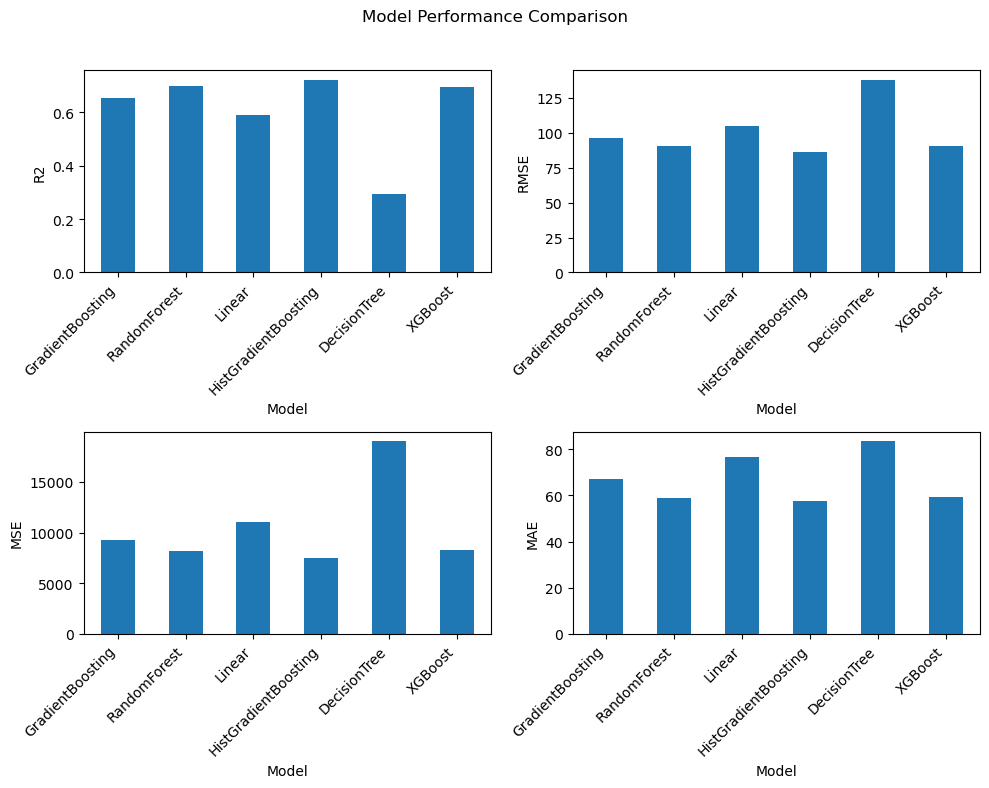

                            MAE           MSE        R2        RMSE
Model                                                              
DecisionTree          83.421474  19003.023055  0.293504  137.851453
GradientBoosting      67.056865   9301.101753  0.654203   96.442220
HistGradientBoosting  57.343720   7470.951933  0.722244   86.434669
Linear                76.610931  11040.179812  0.589547  105.072260
RandomForest          58.851879   8130.520689  0.697723   90.169400
XGBoost               59.338178   8228.837013  0.694068   90.712937


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb

subsetdf = nashvilleDF.copy()
df = subsetdf.copy()

def prepare_data(df, target_col='price'):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def create_models():
    return {
        'GradientBoosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'Linear': LinearRegression(),
        'HistGradientBoosting': HistGradientBoostingRegressor(),
        'DecisionTree': DecisionTreeRegressor(),
        'XGBoost': xgb.XGBRegressor(),
    }

def fit_models(X_train, y_train, models):
    for name, model in models.items():
        model.fit(X_train.astype(float), y_train.astype(float))
    return models

def evaluate_models(X_test, y_test, models):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test.astype(float))

        r2 = r2_score(y_test.astype(float), y_pred)
        mse = mean_squared_error(y_test.astype(float), y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test.astype(float), y_pred)

        results.append({
            'Model': name,
            'R2': r2,
            'RMSE': rmse,
            'MSE': mse,
            'MAE': mae
        })
    return pd.DataFrame(results)

def plot_model_performance(results_df):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Model Performance Comparison')

    metrics = ['R2', 'RMSE', 'MSE', 'MAE']

    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=None)
        ax.set_ylabel(metric)
        ax.set_ylim(bottom=0)
        ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def main(df):
    X_train, X_test, y_train, y_test = prepare_data(df)
    models = create_models()
    models = fit_models(X_train, y_train, models)
    results_df = evaluate_models(X_test, y_test, models)
    plot_model_performance(results_df)
    table = pd.pivot_table(results_df, index='Model', values=['R2', 'RMSE', 'MSE', 'MAE'])
    print(table)

main(df)

In [316]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold

# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Specify the number of folds for k-fold cross-validation
num_folds = 10

# Initialize the KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


# Initialize an array to store the accuracy scores
scores = np.zeros(num_folds)

# Initialize an array to store feature importances for each fold
# The number of columns in X is assumed to be X.shape[1]
feature_importances = np.zeros((num_folds, X.shape[1]))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and test sets
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    # Train your model on the training set
    model.fit(X_train, y_train)

    # Evaluate your model on the test set
    scores[fold] = model.score(X_test, y_test)

    # Get feature importances using permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    feature_importances[fold] = perm_importance.importances_mean

    # Print the results
    print(f'Fold {fold+1}: Accuracy = {scores[fold]}')

# Compute and print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(scores)}')

# Compute the average feature importance across all folds
avg_feature_importances = feature_importances.mean(axis=0)

# Get the top 20 features based on average importance
top_features = np.argsort(avg_feature_importances)[-20:]
top_feature_names = X.columns[top_features]
top_feature_importances = avg_feature_importances[top_features]

top_feature_names, top_feature_importances


Fold 1: Accuracy = 0.7549603661002358
Fold 2: Accuracy = 0.7141487980639089
Fold 3: Accuracy = 0.7429792364619661
Fold 4: Accuracy = 0.6835484106063902
Fold 5: Accuracy = 0.697077732920097
Fold 6: Accuracy = 0.701683151255635
Fold 7: Accuracy = 0.667078761679804
Fold 8: Accuracy = 0.683336066679892
Fold 9: Accuracy = 0.7017086121621661
Fold 10: Accuracy = 0.6676255766377535
Average Accuracy: 0.7014146712567848


(Index(['elevator', 'free parking', 'review_scores_rating',
        'number_of_reviews_l30d', 'availability_365', 'host_acceptance_rate',
        'number_of_reviews', 'maximum_nights', 'resort access',
        'review_scores_location', 'pool', 'beds', 'reviews_per_month',
        'availability_30', 'minimum_maximum_nights', 'bedrooms',
        'minimum_minimum_nights', 'neighbourhood_cleansed_num', 'bathrooms',
        'accommodates'],
       dtype='object'),
 array([0.00659288, 0.00754519, 0.0077494 , 0.00781808, 0.0085149 ,
        0.010212  , 0.01059895, 0.01088477, 0.01111085, 0.01164919,
        0.01331087, 0.01390094, 0.01753163, 0.01836989, 0.02121975,
        0.02742831, 0.04932217, 0.07379863, 0.15165726, 0.31969819]))

In [317]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from collections import defaultdict

# Define function to get feature importances
def get_feature_importance(data, features):
    X = data[features]
    y = data['price']
    
    model = HistGradientBoostingRegressor()
    model.fit(X, y)
    
    # Using permutation importance to get feature importances
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    
    return dict(zip(features, importances))

# Iteratively get feature importances for random feature subsets
iterations = 100  # Number of iterations
num_features = 20

feature_columns = [col for col in nashvilleDF.columns if col != 'price']

collective_importances = defaultdict(float)

for _ in range(iterations):
    selected_features = np.random.choice(feature_columns, num_features, replace=False)
    
    importances = get_feature_importance(nashvilleDF, selected_features)
    
    for feature, importance in importances.items():
        collective_importances[feature] += importance

# Sort features by their collective importance
sorted_features = sorted(collective_importances.keys(), key=lambda x: collective_importances[x], reverse=True)

print(sorted_features)


['accommodates', 'bathrooms', 'beds', 'bedrooms', 'reviews_per_month', 'washer', 'review_scores_rating', 'number_of_reviews', 'review_scores_value', 'neighbourhood_cleansed_num', 'minimum_minimum_nights', 'minimum_maximum_nights', 'review_scores_accuracy', 'review_scores_cleanliness', 'number_of_reviews_ltm', 'maximum_nights', 'availability_365', 'availability_30', 'review_scores_location', 'prop_Private room', 'room_type_num', 'host_is_superhost', 'room_Private room', 'review_scores_checkin', 'cooking basics', 'host_acceptance_rate', 'kitchen', 'single level home', 'maximum_maximum_nights', 'city skyline view', 'lock on bedroom door', 'room_Entire home/apt', 'dryer', 'free street parking', 'private entrance', 'prop_Entire home', 'instant_bookable', 'luggage dropoff allowed', 'conditioner', 'bathtub', 'hot tub', 'camera', 'dishes and silverware', 'crib', 'cable', 'host_response_time', 'keypad', 'fireplace', 'prop_Entire rental unit', 'host_response_rate', 'pool', 'prop_Entire townhouse

In [318]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

# Split the data into features and target
X = nashvilleDF.drop('price', axis=1)
y = nashvilleDF['price']

# Initialize the model
model = HistGradientBoostingRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances using permutation importance
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=42)

# Get the top 20 features
top_20_features = sorted(zip(perm_importance.importances_mean, X.columns), reverse=True)[:20]
top_20_features


[(0.3457677632439967, 'accommodates'),
 (0.1830832631926314, 'bathrooms'),
 (0.09079906595494736, 'neighbourhood_cleansed_num'),
 (0.05580018976996823, 'minimum_minimum_nights'),
 (0.03628107414652034, 'bedrooms'),
 (0.033453758560210864, 'availability_30'),
 (0.029899243166609073, 'reviews_per_month'),
 (0.028632958844794096, 'minimum_maximum_nights'),
 (0.024849573203078793, 'beds'),
 (0.02257358376690975, 'availability_365'),
 (0.022160437993399344, 'maximum_nights'),
 (0.020509419581114994, 'review_scores_location'),
 (0.01884801707982435, 'host_acceptance_rate'),
 (0.015382120408427272, 'number_of_reviews'),
 (0.015271536625491567, 'pool'),
 (0.013714811021187316, 'number_of_reviews_l30d'),
 (0.013498352691613102, 'review_scores_rating'),
 (0.012030169670378846, 'resort access'),
 (0.009597754002023147, 'elevator'),
 (0.009156770845300814, 'private entrance')]

In [319]:
# Categorizing amenities into defined buckets
kitchen_amenities = [
    "coffee", "kitchen", "refrigerator", "dishes and silverware", "microwave",
    "oven", "stove", "cooking basics", "freezer", "wine glasses", "toaster", 
    "hot water kettle", "grill", "blender", "barbecue utensils", "rice maker",
    "nespresso", "espresso machine", "french press", "bread maker", "dining table",
    "baking sheet", "gas", "we have a countertop burner"
]

cleaning_amenities = [
    "dryer", "washer", "shampoo", "iron", "hot water", "soap", "cleaning products", 
    "shower gel", "conditioner", "cleaning available during stay", "body wash", 
    "lotion", "suave", "irish spring", "la botegga", "dove anti-stress moisturizing cream bar"
]

safety_amenities = [
    "smoke alarm", "carbon monoxide alarm", "fire extinguisher", "first aid kit", 
    "keypad", "smart lock", "lockbox", "camera", "lock on bedroom door", "safe", 
    "baby safety gates", "outlet covers", "table corner guards", "window guards", 
    "ev charger", "ev charger - level 2", "ev charger - level 1", "tesla only"
]

household_amenities = [
    "radiant heating", "essentials", "hangers", "self check-in", "bed linens", 
    "free parking", "air conditioning", "private entrance", "extra pillows and blankets", 
    "dedicated workspace", "free street parking", "long term stays allowed", "clothing storage",
    "ceiling fan", "central air conditioning", "private patio or balcony", "room-darkening shades", 
    "luggage dropoff allowed", "single level home", "elevator", "fireplace", 
    "books and reading material", "laundromat nearby", "board games", "backyard", 
    "outdoor furniture", "patio or balcony", "outdoor dining area", "gym", 
    "fire pit", "high chair", "crib", "pool", "hot tub", "breakfast", "resort access", 
    "city skyline view", "exercise equipment", "portable fans", "childrenu2019s dinnerware",
    "building staff", "babysitter recommendations", "free driveway", "closet", 
    "shared patio or balcony", "record player", "trash compactor", "sun loungers",
    "closet", "wardrobe", "portable heater", "bidet", "changing table", "bikes",
    "hammock", "2-5 years old", "5-10 years old", "and 10 years old", "and 5-10 years old",
    "rooftop", "saltwater", "infinity", "beach essentials", "mosquito net", "heated", 
    "dvd player", "ev charger - level 1", "private sauna", "shared sauna", "window ac unit", 
    "host greets you", "piano", "baby monitor", "ping pong table", "private living room", 
    "portable air conditioning", "smoking allowed", "baby bath", "beach access", "ski-in/ski-out", 
    "wood-burning", "outdoor shower", "ac - split type ductless system", "window ac unit", 
    "all natural", "stainless", "portable", "sono", "but good size not standard large size", 
    "smaller", "some type", "two racks", "organic", "olympic-sized", "smaller fridge"
]

bedroom_amenities = [
    "hangers", "bed linens", "extra pillows and blankets", "room-darkening shades", 
    "crib", "single level home", "closet", "wardrobe", "and dresser", "changing table"
]

electronics_amenities = [
    "wifi", "tv", "ethernet connection", "cable", "roku", "hulu", "disney", "hbo", 
    "netflix", "amazon prime video", "bluetooth", "game console", "xbox 360", "and xbox one", 
    "sound system", "vizio soundbar", "chromecast"
]

extra_spaces_amenities = [
    "patio or balcony", "pool", "garden or backyard", "hot tub", "BBQ grill", 
    "private living room", "gym", "fire pit", "outdoor dining area", "backyard", 
    "outdoor furniture", "private patio or balcony", "gym", "fireplace", "rooftop", 
    "beach access", "ski-in/ski-out", "outdoor shower", "resort access", "waterfront", 
    "resort view", "harbor view", "beach view", "sea view", "ocean view", 
    "lake access", "mountain view", "valley view", "golf course view", "lake view", 
    "marina view", "public or shared beach access", "canal view", "boat slip", "bay view", 
    "park view"
]

review_amenities = [
    "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating",
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value"
]


# Return the categorized amenities
categorized_amenities = {
    "Kitchen Amenities": kitchen_amenities,
    "Cleaning Amenities": cleaning_amenities,
    "Safety Amenities": safety_amenities,
    "Household Amenities": household_amenities,
    "Bedroom Amenities": bedroom_amenities,
    "Electronics Amenities": electronics_amenities,
    "Extra Spaces Amenities": extra_spaces_amenities,
    "Review Amenities": review_amenities    

}

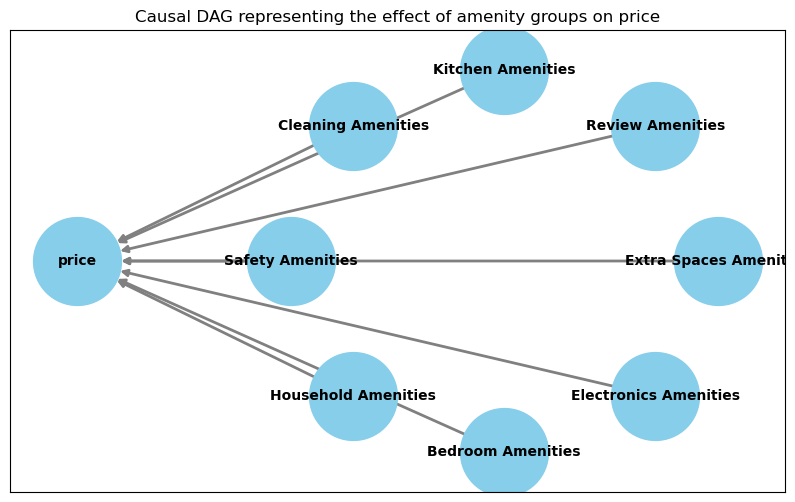

In [320]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add nodes for each amenity group
amenity_groups_names = [
    "Kitchen Amenities", "Cleaning Amenities", "Safety Amenities",
    "Household Amenities", "Bedroom Amenities", "Electronics Amenities",
    "Extra Spaces Amenities", "Review Amenities"
]
for group in amenity_groups_names:
    G.add_node(group)

# Add edges from each amenity group to 'price'
for group in amenity_groups_names:
    G.add_edge(group, 'price')

# Plot the DAG
plt.figure(figsize=(10, 6))

# Use shell_layout instead of spring_layout
shell_nestings = [amenity_groups_names, ['price']]  # Define the concentric circles
pos = nx.shell_layout(G, nlist=shell_nestings)

nx.draw_networkx(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=10, font_weight='bold', width=2, edge_color='gray')
plt.title("Causal DAG representing the effect of amenity groups on price")
plt.show()



In [321]:

from sklearn.model_selection import KFold
import numpy as np

# Load your data into a pandas DataFrame
data = nashvilleDF.copy()

# Split your data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Define the number of folds
num_folds = 10

# Initialize the cross-validation method
kf = KFold(n_splits=num_folds)

# Initialize a linear regression model
model = HistGradientBoostingRegressor()

# Initialize an array to store the accuracy scores
scores = np.zeros(num_folds)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):

    # Split the data into training and test sets
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    # Train your model on the training set
    model.fit(X_train, y_train)

    # Evaluate your model on the test set
    scores[fold] = model.score(X_test, y_test)

    # Print the results
    print(f'Fold {fold+1}: Accuracy = {scores[fold]}')

# Compute and print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(scores)}')

Fold 1: Accuracy = 0.7293926018591339
Fold 2: Accuracy = 0.7141117119583927
Fold 3: Accuracy = 0.660875806778892
Fold 4: Accuracy = 0.6370609000937324
Fold 5: Accuracy = 0.6843725943827541
Fold 6: Accuracy = 0.6869909254592366
Fold 7: Accuracy = 0.6970198907671064
Fold 8: Accuracy = 0.2956410805604869
Fold 9: Accuracy = 0.646990767679094
Fold 10: Accuracy = 0.4186215889238363
Average Accuracy: 0.6171077868462665


Text(0.5, 0, 'Accomodates')

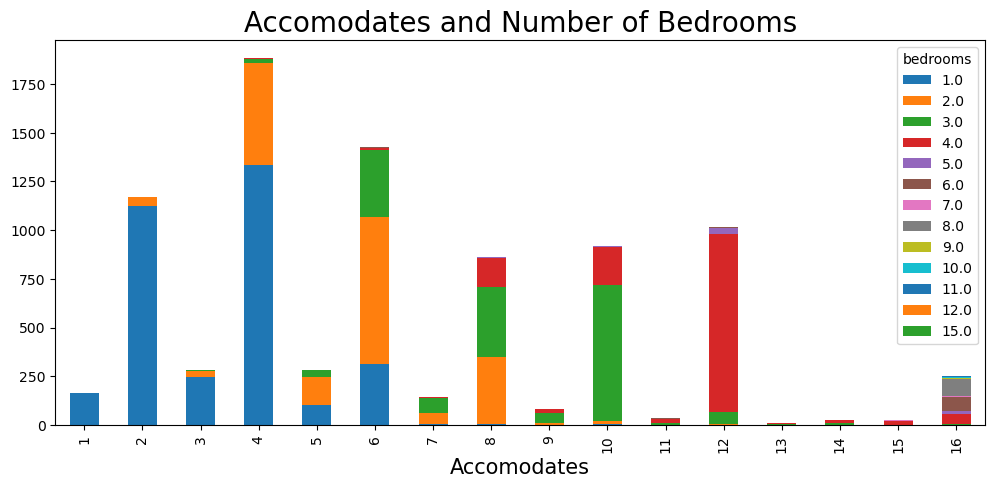

In [322]:
model1_plot = nashvilleDF.groupby(['accommodates', 'bedrooms']).size().reset_index().pivot(columns='bedrooms',
                                                                                  index='accommodates', values=0)

model1_plot.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Accomodates and Number of Bedrooms", size=20)
plt.xlabel("Accomodates", size=15)